# Esoph statistics
First of all, show the stats of the dataset and show the correlation of any two columns. 

   agegp          alcgp         tobgp        ncases         ncontrols    
 25-34:15   0-39g/day:23   0-9g/day:24   Min.   : 0.000   Min.   : 1.00  
 35-44:15   40-79    :23   10-19   :24   1st Qu.: 0.000   1st Qu.: 3.00  
 45-54:16   80-119   :21   20-29   :20   Median : 1.000   Median : 6.00  
 55-64:16   120+     :21   30+     :20   Mean   : 2.273   Mean   :11.08  
 65-74:15                                3rd Qu.: 4.000   3rd Qu.:14.00  
 75+  :11                                Max.   :17.000   Max.   :60.00  

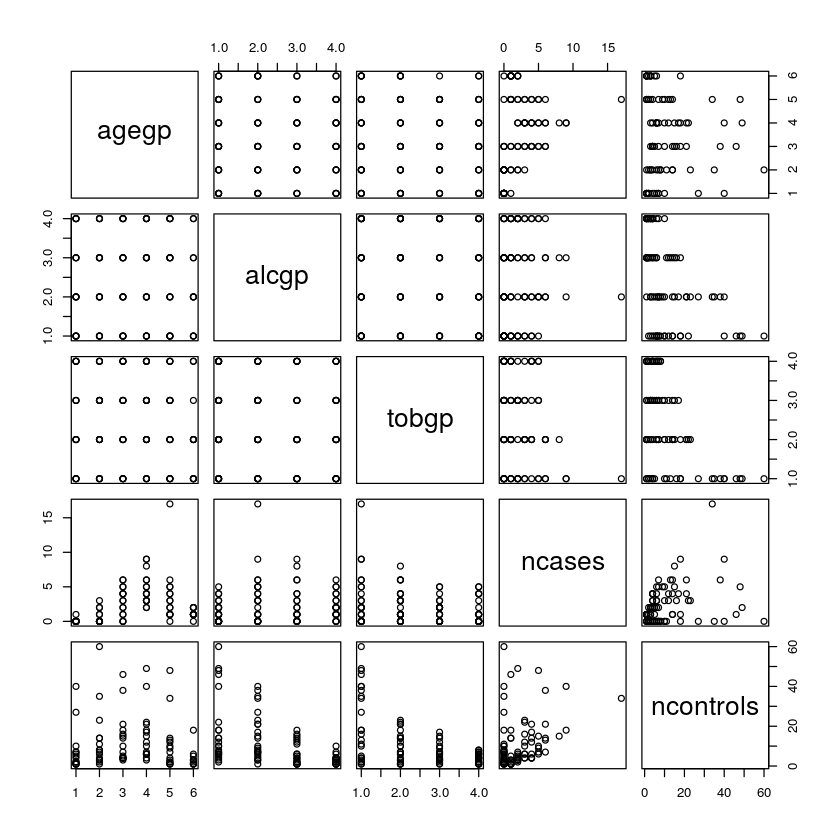

In [10]:
summary(esoph)
pairs(esoph)

# Esoph Structure
How does the dataset look like:

In [12]:
str(esoph)
head(esoph)

'data.frame':	88 obs. of  5 variables:
 $ agegp    : Ord.factor w/ 6 levels "25-34"<"35-44"<..: 1 1 1 1 1 1 1 1 1 1 ...
 $ alcgp    : Ord.factor w/ 4 levels "0-39g/day"<"40-79"<..: 1 1 1 1 2 2 2 2 3 3 ...
 $ tobgp    : Ord.factor w/ 4 levels "0-9g/day"<"10-19"<..: 1 2 3 4 1 2 3 4 1 2 ...
 $ ncases   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ ncontrols: num  40 10 6 5 27 7 4 7 2 1 ...


agegp,alcgp,tobgp,ncases,ncontrols
25-34,0-39g/day,0-9g/day,0,40
25-34,0-39g/day,10-19,0,10
25-34,0-39g/day,20-29,0,6
25-34,0-39g/day,30+,0,5
25-34,40-79,0-9g/day,0,27
25-34,40-79,10-19,0,7


# Effects of alcohol, tobacco and interaction, age-adusted

This Modell is shown in the help(esoph) documentation

In [15]:
model1 <- glm(cbind(ncases, ncontrols) ~ agegp + tobgp * alcgp,
              data = esoph, family = binomial())
anova(model1)

,Df,Deviance,Resid. Df,Resid. Dev
NULL,NA,NA,87,227.24056
agegp,5,88.12808,82,139.11248
tobgp,3,19.08475,79,120.02773
alcgp,3,66.05445,76,53.97328
tobgp:alcgp,9,6.48949,67,47.48379


# Example Plot
This example of Data Visualization has its origin in the help documentation of esoph [help(esoph)], too.

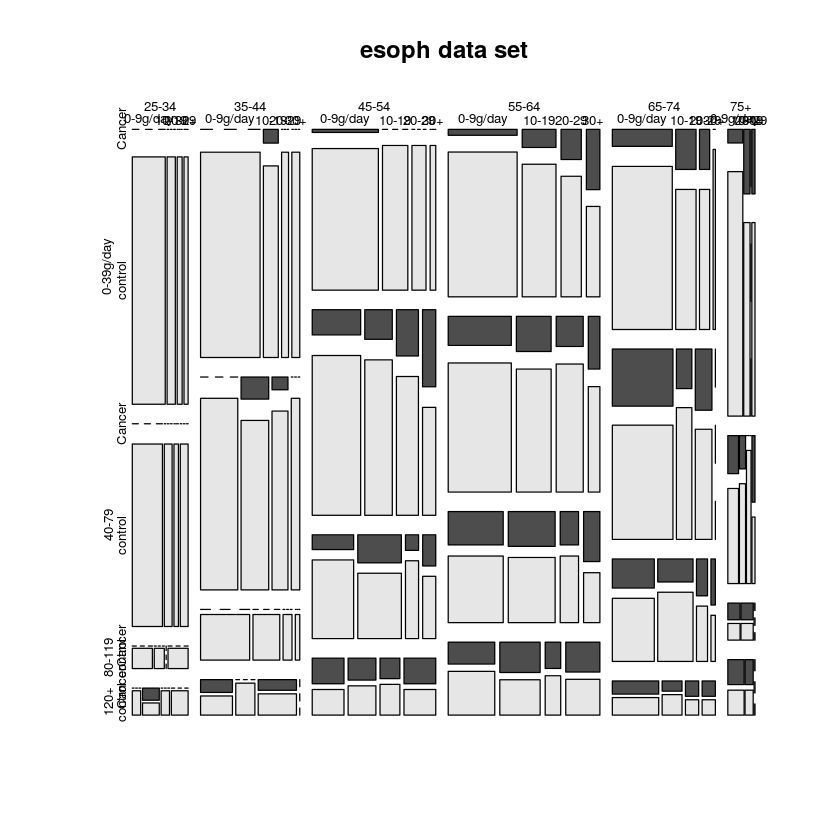

In [16]:
ttt <- table(esoph$agegp, esoph$alcgp, esoph$tobgp)
o <- with(esoph, order(tobgp, alcgp, agegp))
ttt[ttt == 1] <- esoph$ncases[o]
tt1 <- table(esoph$agegp, esoph$alcgp, esoph$tobgp)
tt1[tt1 == 1] <- esoph$ncontrols[o]
tt <- array(c(ttt, tt1), c(dim(ttt),2),
            c(dimnames(ttt), list(c("Cancer", "control"))))
mosaicplot(tt, main = "esoph data set", color = TRUE)

On the x-axis the data is grouped by the age-ranges and within by the tobacco consumption, the y-axis is grouped by the alcohol consumption and the control/cancer information.

The more dark grey tiles appear, the more cancer is found at the subjectives.

To summerize the data: the more alcohol a person drinks and the higher the age of this person is, the higher is the cancer risk. A higher consumption of tobacco also has a higher risk of getting cancer.

An additional info is given: If a person drinks a lot, it doesn't matter if he smokes less or more. The cancer risk is everytime relativly high.

# Detailled View
Breaking down the Data into 9 diagrams with boxplots.

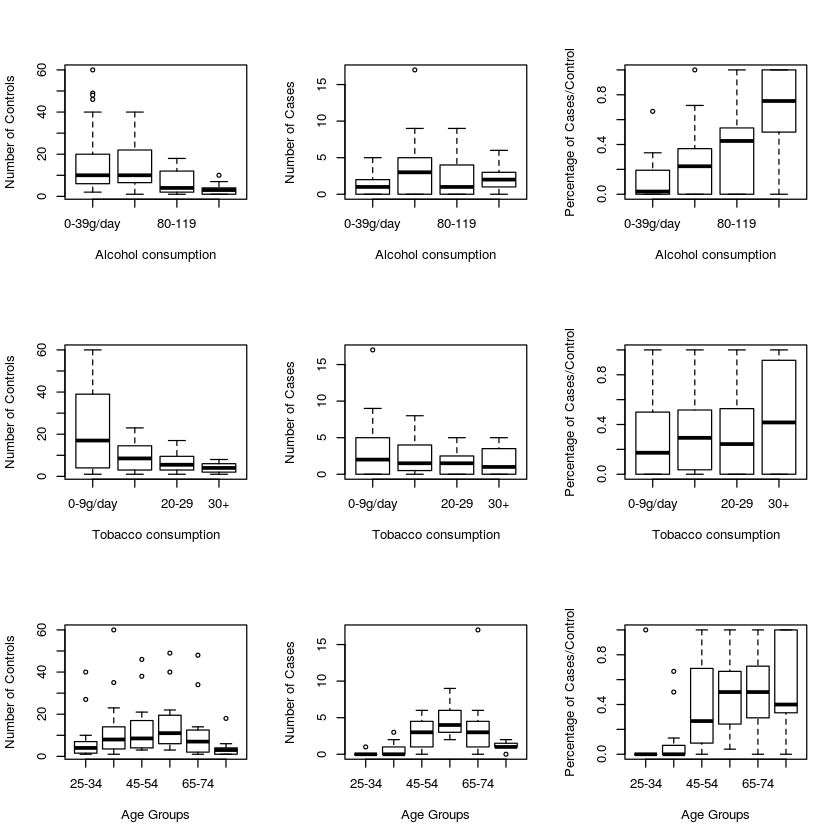

In [17]:
par(mfrow=c(3,3)) # create a 3x3 Display Matrix

plot(esoph$alcgp, esoph$ncontrols,  pch = 21, xlab = 'Alcohol consumption', ylab = 'Number of Controls')
plot(esoph$alcgp, esoph$ncases,  pch = 21, xlab = 'Alcohol consumption', ylab = 'Number of Cases')
plot(esoph$alcgp, esoph$ncases/esoph$ncontrols,  pch = 21, xlab = 'Alcohol consumption', ylab = 'Percentage of Cases/Control')

plot(esoph$tobgp, esoph$ncontrols,  pch = 21, xlab = 'Tobacco consumption', ylab = 'Number of Controls')
plot(esoph$tobgp, esoph$ncases,  pch = 21, xlab = 'Tobacco consumption', ylab = 'Number of Cases')
plot(esoph$tobgp, esoph$ncases/esoph$ncontrols,  pch = 21, xlab = 'Tobacco consumption', ylab = 'Percentage of Cases/Control')

plot(esoph$agegp, esoph$ncontrols,  pch = 21, xlab = 'Age Groups', ylab = 'Number of Controls')
plot(esoph$agegp, esoph$ncases,  pch = 21, xlab = 'Age Groups', ylab = 'Number of Cases')
plot(esoph$agegp, esoph$ncases/esoph$ncontrols,  pch = 21, xlab = 'Age Groups', ylab = 'Percentage of Cases/Control')

par(mfrow=c(1,1)) # reset to single diagram view

Visualizing the Information about the Number of Controls, Number of Cases and the Percentage of Cancer Cases in respect to the controls (first, second and third column).

The first Row shows the Controls and Cases for Alcohol Consumption, the second row for Tobacco Consumption and the third row shows the information regarding the several Age Groups.

# Detailled View (2)

The next Plots are made with additional libraries. After too many hours searching how the combining of ncases and ncontrols will be, i found an ggplot2 tutorial with the esoph dataset, it can be found at https://stats.idre.ucla.edu/r/seminars/ggplot2_intro/ and in parts will be used for the next charts.

In [4]:
# libraries used
library(reshape2) # melting
library(dplyr)    # set sorting with arrange()
library(ggplot2)  # plotting

In [16]:
# melt and rearrange the esoph dataset

melted_esoph <- melt(esoph)
melted_esoph <- arrange(melted_esoph, agegp, alcgp, tobgp)
head(melted_esoph)

Using agegp, alcgp, tobgp as id variables


agegp,alcgp,tobgp,variable,value
25-34,0-39g/day,0-9g/day,ncases,0
25-34,0-39g/day,0-9g/day,ncontrols,40
25-34,0-39g/day,10-19,ncases,0
25-34,0-39g/day,10-19,ncontrols,10
25-34,0-39g/day,20-29,ncases,0
25-34,0-39g/day,20-29,ncontrols,6


In [17]:
# renaming "variable" to "status" and "value" to "n"
colnames(melted_esoph)[4:5] <- c("status", "n")
head(melted_esoph)

agegp,alcgp,tobgp,status,n
25-34,0-39g/day,0-9g/day,ncases,0
25-34,0-39g/day,0-9g/day,ncontrols,40
25-34,0-39g/day,10-19,ncases,0
25-34,0-39g/day,10-19,ncontrols,10
25-34,0-39g/day,20-29,ncases,0
25-34,0-39g/day,20-29,ncontrols,6


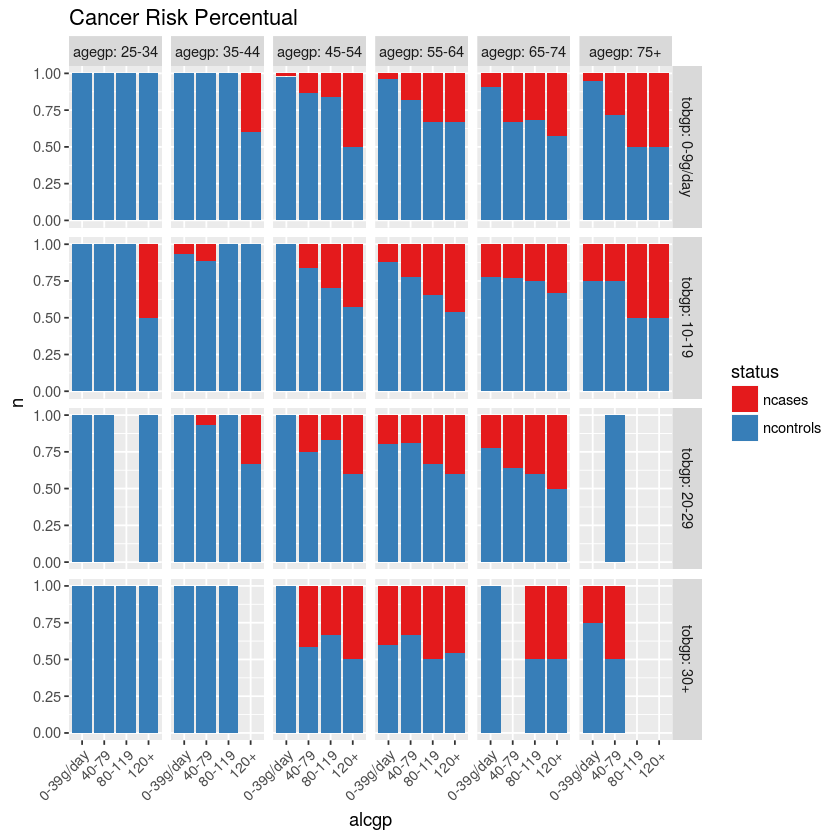

In [44]:
ggplot(melted_esoph, aes(x=alcgp, y=n, fill = status)) + 
  geom_bar(stat = "identity", position = "fill") +
  ggtitle("Cancer Risk Percentual") +
  facet_grid(tobgp ~ agegp, labeller = "label_both") +
  scale_fill_brewer(palette = "Set1") +
  theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))

This chart shows, that the Cancer Cases per Control increase at subjects who are older or drink more alcohol. The same ist true for tobacco consumption, but less marked.

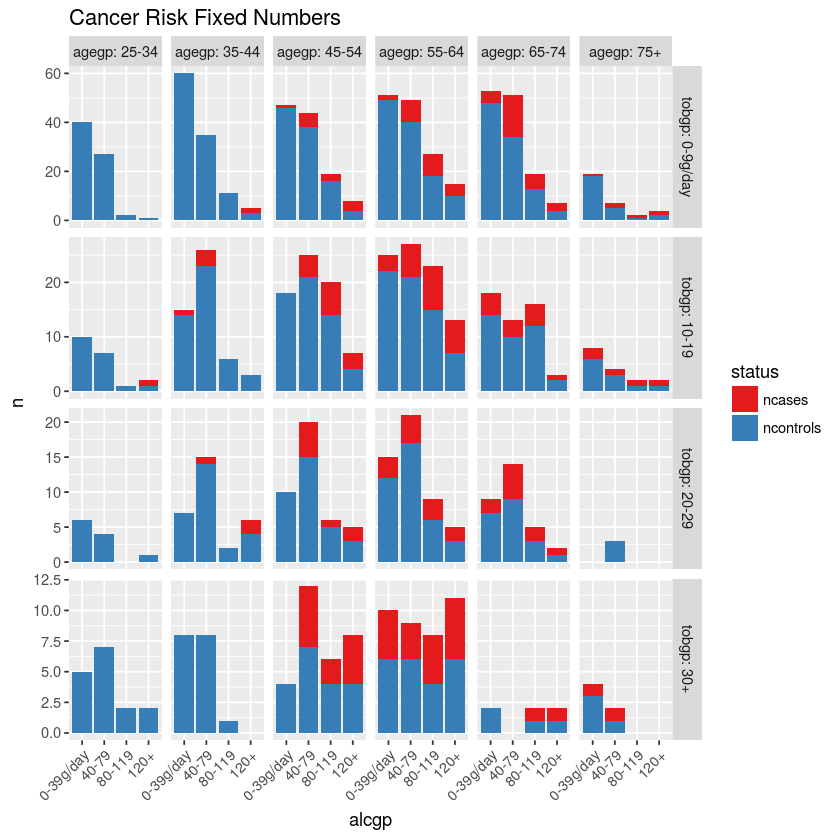

In [45]:
ggplot(melted_esoph, aes(x=alcgp, y=n, fill = status)) + 
  geom_bar(stat = "identity", position = "stack") +
  ggtitle("Cancer Risk Fixed Numbers") +
  facet_grid(tobgp ~ agegp, labeller = "label_both", scales = "free") +
  scale_fill_brewer(palette = "Set1") +
  theme(axis.text.x = element_text(angle=45, hjust=1, vjust=1))

The second chart shows, the distributions of controls side by side with the cases. 
What can be seen is for example, that smaller amounts of controls are made of people who smoke more.